In [5]:
"""
This file is bernoulli_flowmeter_study_2022_04_16.py

April 16, 2022

@author: g-gollin

Plot data from Bernoulli flowmeter v5.

"""

# read a CSV file wih flowmeter data.

# import libraries. See
# https://matplotlib.org/stable/tutorials/introductory/sample_plots.html

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import time
# my own histogramming code
#import histogramObject as hb
# import a module that can read csv (comma separated variable) files.
import csv
import math
from mpl_toolkits.mplot3d import Axes3D
from random import Random
import os

from pylab import * 


# hbookObject contains tools for creating an hbook-style
# histogram.

# use this way:
#   import histogramObject as hb
#
#   histo1 = hb.histo('a 1-D histogram', 10, 0., 100.)
#   histo2 = hb.histo('a scatterplot', 10, 0., 100., 15, 0., 4.)
#
#   histo1.hsetlabels('my x axis', 'my y axis');
#
#   histo1.hfill(the_xvalue);
#   histo2.hfill(an_xvalue, a_yvalue);
#
#   histo1.hprint();
#   histo2.hprint();
#
# for a logarithmic y scale use hprintlog instead of hprint:
#   histo1.hprintlog();
#   histo2.hprintlog();


############# initialize stuff ###########

# keep track of execution time
start_time = time.time()

print("set current working directory now ")
os.chdir('/Users/gavin/Desktop')
print("Current working directory is ", os.getcwd())

# CSV filename
# filename = "DPS310A.CSV"
# filename = "DPS310D.CSV"
# filename = "DPS310A_old2.CSV"
# filename = "DPS310D_2022_02_18b_.CSV"
# filename = "DPS310D_2022_02_18b.CSV"
# filename = "DPS310D_2022_02_23.CSV"
# filename = "DPS310E.CSV"
filename = "/Users/gavin/Projects/Ventilator Flow Monitor/Data/Short Tube Data 4-25.csv"
# get a line count in this file. Found on the web:
# https://stackoverflow.com/questions/845058/how-to-get-line-count-of-a-large-file-cheaply-in-python 

NumberOfCSVLines = sum(1 for line in open(filename))
print("Number of lines in ", filename, " is ", NumberOfCSVLines)

# set up arrays to hold anemometer data.
# format in the file, on one line, is this (as of 4/2022):
# millis value, "T and P:", 
# temperature0, pressure0 (hPa),
# temperature1, pressure1 (hPa), 
# temperature2, pressure2 (hPa), 
# temperature3, pressure3 (hPa), 
# temperature4, pressure4 (hPa), 
# "corrected P0 - P1 in Pa:", corrected pressure0 - pressure1,
# "corrected P2 - P3 in Pa:", corrected pressure2 - pressure3,
# "Current time (UTC):", hh:mm:ss,
# "Date (dd/mm/yyyy):", dd/mm/yyyy,
# "patient ID", ID

millis = np.array([0] * NumberOfCSVLines)

t0 = np.array([0.0] * NumberOfCSVLines)
p0 = np.array([0.0] * NumberOfCSVLines)


t1 = np.array([0.0] * NumberOfCSVLines)
p1 = np.array([0.0] * NumberOfCSVLines)

t2 = np.array([0.0] * NumberOfCSVLines)
p2 = np.array([0.0] * NumberOfCSVLines)

t3 = np.array([0.0] * NumberOfCSVLines)
p3 = np.array([0.0] * NumberOfCSVLines)

t4 = np.array([0.0] * NumberOfCSVLines)
p4 = np.array([0.0] * NumberOfCSVLines)

p0_p1 = np.array([0.0] * NumberOfCSVLines)
p2_p3 = np.array([0.0] * NumberOfCSVLines)

UTC_time = np.array(["00:00:00"] * NumberOfCSVLines)
UTC_date = np.array(["01/01/2022"] * NumberOfCSVLines)

# # create a few histograms
# histo_p0_p1 = hb.histo('1. p0 - p1, Pascals', 1401, -9., 20.)
# histo_p0_p1.hsetlabels('p0 - p1', 'N');

# histo_p0_p1a = hb.histo('1a. p0 - p1, Pascals', 401, -2., 2.)
# histo_p0_p1a.hsetlabels('p0 - p1', 'N');

# histo_p0_p1b = hb.histo('1b. p0 - p1, Pascals', 601, 3.5, 9.5)
# histo_p0_p1b.hsetlabels('p0 - p1', 'N');


# now read the file.
with open(filename) as csvfile:

    # array index
    index = 0
    
    # umm... something to do with reading the CSV file.
    filereader = csv.reader(csvfile)
    
    for row in filereader:
        
        # load arrays of data for this line...
        millis[index] = row[0]

        t0[index] = row[6] #6
        p0[index] = row[7] #7

        t1[index] = row[4]
        p1[index] = row[5]

        t2[index] = row[2] #2
        p2[index] = row[3] #3

        p0_p1[index] = p0[index] - p1[index]
        
        #p2_p3[index] = row[15]
        
        index = index + 1

p0mean = np.mean(p0)
p1mean = np.mean(p1)
p2mean = np.mean(p2)
print("p0 mean = ", p0mean)
print("p1 mean = ", p1mean)
print("p2 mean = ", p2mean)

for index in range(0, NumberOfCSVLines):
    histo_p0_p1.hfill(p0_p1[index])

    if(p0_p1[index] >= -2. and p0_p1[index] <= 2.):
        histo_p0_p1a.hfill(p0_p1[index])
        
    if(p0_p1[index] >= 3.5 and p0_p1[index] <= 9.5):
        histo_p0_p1b.hfill(p0_p1[index])

          

# close already-open graphics windows
matplotlib.pyplot.close("all")

# plot some histograms.
histo_p0_p1.hprint()
histo_p0_p1a.hprint()
histo_p0_p1b.hprint()


first_bin = 0
last_bin = 4000

# now plot pressure vs time
fig = plt.figure()
# define axis handle
ax = fig.gca()
# set labels and title
ax.set_xlabel("time (seconds)")
ax.set_ylabel("pressure, hPa")
ax.set_title("5. pressure sensor readings vs time (0:black, 1:red)")
ax.plot(millis/1000, p0, '-', c = 'black')
ax.plot(millis/1000, p1, '-', c = 'red')

# now plot pressure differences vs time
last_bin = 2500
fig = plt.figure()
# define axis handle
ax = fig.gca()
# set labels and title
ax.set_xlabel("time (seconds)")
ax.set_ylabel("pressure differences, baseline-subtracted, Pa")
ax.set_title("6. p0-p1 vs time.")
ax.plot(millis[first_bin:last_bin]/1000, p0_p1[first_bin:last_bin], '.', c = 'black', markersize = 1, alpha = 0.4)
ax.set_ylim(-2, 10)

last_bin = 4000



# now plot temperature vs time
fig = plt.figure()
# define axis handle
ax = fig.gca()
# set labels and title
ax.set_xlabel("time (seconds)")
ax.set_ylabel("temperature, *C")
ax.set_title("9. Uncompensated temperatures vs time (0:black, 1:red)")
ax.plot(millis/1000, t0, '-', c = 'black')
ax.plot(millis/1000, t1, '-', c = 'red')

# now plot pressure differences vs. temperature
fig = plt.figure()
# define axis handle
ax = fig.gca()
# set labels and title
ax.set_xlabel("temperature 0, *C")
ax.set_ylabel("corrected pressure differences, Pa")
ax.set_title("10. p0-p1 vs temperature 0")
ax.plot(t0, p0_p1, '.', c = 'black', markersize = 1, alpha = 0.4)

# now plot pressure differences vs. pressure
fig = plt.figure()
# define axis handle
ax = fig.gca()
# set labels and title
ax.set_xlabel("pressure 0, *C")
ax.set_ylabel("corrected pressure differences, Pa")
ax.set_title("11. p0-p1 vs pressure 0")
ax.plot(p0, p0_p1, '.', c = 'black', markersize = 1, alpha = 0.4)


set current working directory now 
Current working directory is  /Users/gavin/Desktop
Number of lines in  /Users/gavin/Projects/Ventilator Flow Monitor/Data/Short Tube Data 4-25.csv  is  820
p0 mean =  23.497256097560975
p1 mean =  22.86168292682927
p2 mean =  22.89359756097561


/var/folders/3_/596gx0f10xg46rczf6hpm5bm0000gn/T/ipykernel_6049/5850121.py:77: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  NumberOfCSVLines = sum(1 for line in open(filename))


NameError: name 'histo_p0_p1' is not defined

In [41]:
print(p0[:10] - p1[:10])

[-0.021362 -0.018982 -0.023987 -0.025086 -0.02533  -0.022277 -0.022827
 -0.022461 -0.022705 -0.022217]


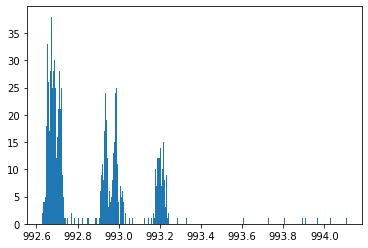

In [42]:
plt.hist(p0,bins=300)
plt.show()

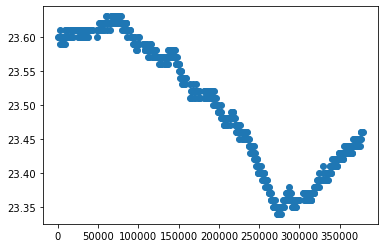

[23.6  23.6  23.6  23.6  23.6  23.59 23.61 23.6  23.6  23.6 ]


-44.99999999999318

In [10]:
plt.scatter(millis,p0)
plt.show()
print(p0[:10])
x=(992.7-993.15) * 100
x

In [2]:
plt.scatter(millis,(p0-p1)*100)

NameError: name 'millis' is not defined

In [61]:
p0off = np.mean(p0[:100])
p0mean = np.mean(p0[500:600])
p1off = np.mean(p1[:100])
p1mean = np.mean(p1[500:600])

print(100*(p0off - p1off))

print(100*(p0mean-p1mean))

print(3.49634200000537+2.2611750000010034)

-2.2611750000010034
3.49634200000537
5.757517000006374
